# Lecture 16 2018-10-11: Numpy

Numpy arrays (4.1); functions on ndarrays (4.2); png (4.6)

This worksheet accompanies the lecture notes.

*numpy* is a package in the *scipy* suite of packages that contains specialized modules for numerical computing, that is for writing programs that use or produce larger, more complex, collections of numeric data. (Scipy is for scientific computing in general). 

You can do anything in basic python that you can do with numpy, but it is usually much, much harder.
In particular, 

* numpy provides data objects for multi dimensional (aka *n dimensional*) arrays, whereas python only supports one dimensional arrays (lists). 
* Numpy makes it much easier to index into arrays, and supports "slicing", which makes it possible to work with a part of an array independently. 
* Numpy makes it easy to perform operations, such as arithmetic, on entire arrays
* Numpy provides a rich library for working with pseudorandom numbers
* Numpy is *highly* optimized, whereas basic python functions can be very slow

As with all packages, to access numpy you need to *import* it. The convention is to
>import numpy as np

In [1]:
import numpy as np

## Motivating example: microbiome data
Microbiome data typically take the form of microbial taxa abundances (or relative abundances) for many samples.
The samples can be different individual hosts, different time points, different sampling sites.
You often receive these data in the form of a tab delimited file with data such as this:

```
patientID	Lactobacillus_crispatus	Lactobacillus_iners	Enterococcus_faecalis	Total	Shannon
AYAC01 	0.494516432	0.046142047	7.31E-05	23288	1.248969892
AYAC02 	0.675225602	0.284145679	0.000445213	40926	0.772621598
EM02 	0.012124112	0.646553006	0.00016129	29019	1.094894389
EM03 	0.868437628	0.127769122	0	52892	0.415003646
```

(describe the data)

Suppose we want to compute 1) the average relative abundances of each taxon, and the absolute abundance of each taxa. Perhaps even do a reality check to see if we have all the data. To do this:

0. get the data into a data structure we can work with
1. compute the average of each column (except the first and the last two)
2. multiple the total number of reads by the relative abundance
3. compute the row totals for the relative abundances (do they sum to 1?)

### The hard way

In [2]:
# 0. get the data into a format we can use

headers = ['patientID',
 'Lactobacillus_crispatus',
 'Lactobacillus_iners',
 'Enterococcus_faecalis',
 'Total',
 'Shannon']

data = [['AYAC01', 0.494516432, 0.046142047, 7.31e-05, 23288.0, 1.248969892],
 ['AYAC02', 0.675225602, 0.284145679, 0.000445213, 40926.0, 0.772621598],
 ['EM02', 0.012124112, 0.646553006, 0.00016129, 29019.0, 1.094894389],
 ['EM03', 0.868437628, 0.127769122, 0.0, 52892.0, 0.415003646]]

data

[['AYAC01', 0.494516432, 0.046142047, 7.31e-05, 23288.0, 1.248969892],
 ['AYAC02', 0.675225602, 0.284145679, 0.000445213, 40926.0, 0.772621598],
 ['EM02', 0.012124112, 0.646553006, 0.00016129, 29019.0, 1.094894389],
 ['EM03', 0.868437628, 0.127769122, 0.0, 52892.0, 0.415003646]]

In [1]:
range(10)

range(0, 10)

In [3]:
# 1. compute column averages

number_of_samples = 0
total_of_samples = [0, 0, 0, 0, 0]
column_averages = [0, 0, 0, 0, 0]
for sample in data:
    number_of_samples = number_of_samples + 1
    for column in range(len(total_of_samples)):
        total_of_samples[column] = total_of_samples[column] + sample[1:][column]
#total_of_samples is correct
for column in range(len(total_of_samples)):
    column_averages[column] = total_of_samples[column] / number_of_samples

print('\t'.join(headers))
print('\t'.join([str(x) for x in column_averages]))
## you do it! It's a pain

patientID	Lactobacillus_crispatus	Lactobacillus_iners	Enterococcus_faecalis	Total	Shannon
0.5125759435	0.2761524635	0.00016990075	36531.25	0.88287238125


In [9]:
# 2. multiple the total number of reads by the relative abundance

absolute_abundances = []
for next_sample in data:
    print(next_sample)
    next_abundances = [int(x * next_sample[-2]) for x in next_sample[1:-2]]
    absolute_abundances.append(next_sample[0])
    absolute_abundances.append(next_abundances)
absolute_abundances

['AYAC01', 0.494516432, 0.046142047, 7.31e-05, 23288.0, 1.248969892]
['AYAC02', 0.675225602, 0.284145679, 0.000445213, 40926.0, 0.772621598]
['EM02', 0.012124112, 0.646553006, 0.00016129, 29019.0, 1.094894389]
['EM03', 0.868437628, 0.127769122, 0.0, 52892.0, 0.415003646]


['AYAC01',
 [11516, 1074, 1],
 'AYAC02',
 [27634, 11628, 18],
 'EM02',
 [351, 18762, 4],
 'EM03',
 [45933, 6757, 0]]

In [5]:
# 3. compute the column totals for the relative abundances (do they sum to 1?)

### left as an exercise

### The easy way, with ndarrays

In [16]:
# 0. get the data into a format we can use
sample_ids = [sample[0] for sample in data]
data_all = np.array([sample[1:] for sample in data])
print data_all

data_totals = data_all[:,-2]
print  data_totals

data_shannon = data_all[:,-1]# take the last column
data_rel_abundances = data_all[:,:-2]# except the last 2 column
print data_rel_abundances

#data_abundances

[[  4.94516432e-01   4.61420470e-02   7.31000000e-05   2.32880000e+04
    1.24896989e+00]
 [  6.75225602e-01   2.84145679e-01   4.45213000e-04   4.09260000e+04
    7.72621598e-01]
 [  1.21241120e-02   6.46553006e-01   1.61290000e-04   2.90190000e+04
    1.09489439e+00]
 [  8.68437628e-01   1.27769122e-01   0.00000000e+00   5.28920000e+04
    4.15003646e-01]]
[ 23288.  40926.  29019.  52892.]
[[  4.94516432e-01   4.61420470e-02   7.31000000e-05]
 [  6.75225602e-01   2.84145679e-01   4.45213000e-04]
 [  1.21241120e-02   6.46553006e-01   1.61290000e-04]
 [  8.68437628e-01   1.27769122e-01   0.00000000e+00]]


In [38]:
# 1. compute column averages
type(data_rel_abundances)
data_rel_abundances.mean(axis=1)

array([ 0.18024386,  0.31993883,  0.2196128 ,  0.33206892])

In [30]:
data_rel_abundances.shape

(4, 3)

In [31]:
data_totals

array([ 23288.,  40926.,  29019.,  52892.])

In [32]:
# 2. multiple the total number of reads by the relative abundance

#print('rel abundances: {}\n'.format(data_rel_abundances))
#print('totals: {}\n'.format(data_totals))

total_abundances = data_rel_abundances.T * data_totals

print('total abundances: {}'.format(total_abundances))

total abundances: [[  1.15162987e+04   2.76342830e+04   3.51829606e+02   4.59334030e+04]
 [  1.07455599e+03   1.16289461e+04   1.87623217e+04   6.75796440e+03]
 [  1.70235280e+00   1.82207872e+01   4.68047451e+00   0.00000000e+00]]


In [33]:
total_abundances

array([[  1.15162987e+04,   2.76342830e+04,   3.51829606e+02,
          4.59334030e+04],
       [  1.07455599e+03,   1.16289461e+04,   1.87623217e+04,
          6.75796440e+03],
       [  1.70235280e+00,   1.82207872e+01,   4.68047451e+00,
          0.00000000e+00]])

In [34]:
total_abundances.T

array([[  1.15162987e+04,   1.07455599e+03,   1.70235280e+00],
       [  2.76342830e+04,   1.16289461e+04,   1.82207872e+01],
       [  3.51829606e+02,   1.87623217e+04,   4.68047451e+00],
       [  4.59334030e+04,   6.75796440e+03,   0.00000000e+00]])

In [35]:
# 3. compute the row totals for the relative abundances (do they sum to 1?)

data_rel_abundances.sum(axis=0)

array([  2.05030377e+00,   1.10460985e+00,   6.79603000e-04])

## Introduction to ndarrays

### Creating n-dimensional arrays (np.ndarray)

The basic data structure for numpy is the n-dimensional array, *np.ndarray*. 
Create by casting (*array(old_data)*) or with special methods

#### Numpy provides several ways to create ndarrays

One can cast from other data types as usual, with *np.array()* (note: *array()*, not *nparray*). 
See above for an example.

Numpy attempts to do the "right thing" with casting, as is usual in Python.

In [39]:
# create a 2-dimensional and a 3-dimensional array 
#(note that spacing doesn't matter so make it readable!)
array_2d = np.array([ [1,2,3], [4,5,6] ])
array_3d = np.array(
    [
        [ [1,2,3], [4,5,6] ],
        [ [7,8,9], [10,11,12] ]
    ]
)

array_2d
array_3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [6]:
# interesting error (note what's inside)
error_array = np.array([ [1,2,3], [4,5,6], 7 ])
print(error_array)

error_array = np.array([ [1,2,3], [4,5,6], [] ])
print(error_array)

[list([1, 2, 3]) list([4, 5, 6]) 7]
[list([1, 2, 3]) list([4, 5, 6]) list([])]


Create special arrays directly. 
Note that some provide a *shape* as a paramter--shapes are tuples.

In [50]:
np.zeros(6)
np.zeros((2,3))
np.ones((2,2,3))
np.zeros_like(array_3d)
np.ones_like(array_3d)
np.identity(10)
np.arange(36)
np.sin(np.arange(0,1,0.01))

array([ 0.        ,  0.00999983,  0.01999867,  0.0299955 ,  0.03998933,
        0.04997917,  0.05996401,  0.06994285,  0.07991469,  0.08987855,
        0.09983342,  0.1097783 ,  0.11971221,  0.12963414,  0.13954311,
        0.14943813,  0.15931821,  0.16918235,  0.17902957,  0.18885889,
        0.19866933,  0.2084599 ,  0.21822962,  0.22797752,  0.23770263,
        0.24740396,  0.25708055,  0.26673144,  0.27635565,  0.28595223,
        0.29552021,  0.30505864,  0.31456656,  0.32404303,  0.33348709,
        0.34289781,  0.35227423,  0.36161543,  0.37092047,  0.38018842,
        0.38941834,  0.39860933,  0.40776045,  0.4168708 ,  0.42593947,
        0.43496553,  0.44394811,  0.45288629,  0.46177918,  0.47062589,
        0.47942554,  0.48817725,  0.49688014,  0.50553334,  0.51413599,
        0.52268723,  0.5311862 ,  0.53963205,  0.54802394,  0.55636102,
        0.56464247,  0.57286746,  0.58103516,  0.58914476,  0.59719544,
        0.60518641,  0.61311685,  0.62098599,  0.62879302,  0.63

In [ ]:
np.sin

In [49]:
list(range(0,30,2))

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]

NameError: name 'randn' is not defined

In [75]:
rand_array = np.random.randn(4,3)# 4*3 normal distribution
rand_array

array([[ 0.48767631, -0.6062406 ,  0.44813596],
       [ 0.66263748,  1.17674157,  1.07128099],
       [-0.22348336, -0.21597986,  0.69483283],
       [ 0.58800747,  1.35227754, -0.32739353]])

In [54]:
rand_array.shape

(4, 3)

In [55]:
rand_array.dtype

dtype('float64')

In [56]:
rand_array.size

12

#### Useful metadata in an ndarray

An ndarray is an object representing an array (usually of numbers) of type *ndarray* along with information about the array, such as its underlying data type, number of dimensions, and shape. 

object | value
:----- | :--------
ndim   | number of dimensions
shape  | shape of ndarray (number of items in each dimension)
dtype  | underlying data type
size   | number of data items


In [57]:
rand_array.ndim

2

In [59]:
array_2d = rand_array
array_2d

array([[ 0.67366773, -0.95536656,  1.83519574],
       [ 0.31698803, -0.22317846,  0.6671412 ],
       [-0.6580559 , -1.21531155,  0.06162332],
       [-0.19811637, -1.25460863, -0.23509648]])

In [9]:
# print, and use introspection to look inside these ndarrays (shape, dim, dtype, ...)


#### operations on ndarrays
In general, treat the array as if it were a single mathematical object. See the example above.

In [61]:
a, b, c = 1, 2, 3
x = array_2d
y = array_2d - 10
z = array_2d * 100

print(x)
print(y)
print(z)

print(x+z)
print(x*x*x)
print(x)
print(x**0.5)# pingfang gen?

[[ 0.67366773 -0.95536656  1.83519574]
 [ 0.31698803 -0.22317846  0.6671412 ]
 [-0.6580559  -1.21531155  0.06162332]
 [-0.19811637 -1.25460863 -0.23509648]]
[[ -9.32633227 -10.95536656  -8.16480426]
 [ -9.68301197 -10.22317846  -9.3328588 ]
 [-10.6580559  -11.21531155  -9.93837668]
 [-10.19811637 -11.25460863 -10.23509648]]
[[  67.36677338  -95.53665569  183.51957409]
 [  31.69880344  -22.31784562   66.71412034]
 [ -65.80558992 -121.53115507    6.16233249]
 [ -19.81163672 -125.46086333  -23.50964813]]
[[  68.04044112  -96.49202225  185.35476983]
 [  32.01579147  -22.54102408   67.38126154]
 [ -66.46364582 -122.74646662    6.22395582]
 [ -20.00975308 -126.71547197  -23.74474461]]
[[  3.05729426e-01  -8.71987187e-01   6.18083540e+00]
 [  3.18514059e-02  -1.11162117e-02   2.96929462e-01]
 [ -2.84962925e-01  -1.79499349e+00   2.34010520e-04]
 [ -7.77608622e-03  -1.97480771e+00  -1.29938661e-02]]
[[ 0.67366773 -0.95536656  1.83519574]
 [ 0.31698803 -0.22317846  0.6671412 ]
 [-0.6580559  -1.

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in sqrt


In [62]:
inv = 1/x
print(inv)
print([inv**i for i in range(5)])

[[  1.48441131  -1.04671866   0.544901  ]
 [  3.15469321  -4.48071923   1.49893305]
 [ -1.51962774  -0.82283428  16.22762162]
 [ -5.04753855  -0.79706131  -4.25357281]]
[array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]]), array([[  1.48441131,  -1.04671866,   0.544901  ],
       [  3.15469321,  -4.48071923,   1.49893305],
       [ -1.51962774,  -0.82283428,  16.22762162],
       [ -5.04753855,  -0.79706131,  -4.25357281]]), array([[   2.20347692,    1.09561995,    0.2969171 ],
       [   9.95208925,   20.0768448 ,    2.24680029],
       [   2.30926847,    0.67705625,  263.33570332],
       [  25.47764538,    0.63530673,   18.09288163]]), array([[  3.27086605e+00,  -1.14680584e+00,   1.61790427e-01],
       [  3.13957884e+01,  -8.99587045e+01,   3.36780322e+00],
       [ -3.50922843e+00,  -5.57105086e-01,   4.27331215e+03],
       [ -1.28599397e+02,  -5.06378415e-01,  -7.69593893e+01]]), array([[  4.85531055e+00,   1.20038307e+00,   8.815976

In [63]:
print(np.sin(rand_array))

[[ 0.62385665 -0.81652541  0.96524963]
 [ 0.31170607 -0.22133036  0.61874267]
 [-0.61157987 -0.93747788  0.06158433]
 [-0.19682289 -0.95042774 -0.23293681]]


In [64]:
np.sin(array_2d)
np.log2(array_2d)
np.exp(array_2d)
np.sqrt(array_2d)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log2
  from ipykernel import kernelapp as app
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in sqrt


array([[ 0.82077264,         nan,  1.35469397],
       [ 0.5630169 ,         nan,  0.81678712],
       [        nan,         nan,  0.24824046],
       [        nan,         nan,         nan]])

Comparisons are element-wise

In [76]:
#print(x)
x*x == x**2 # x de pingfang
print(rand_array)
rand_array < 0
#rand_array > 0.5

[[ 0.48767631 -0.6062406   0.44813596]
 [ 0.66263748  1.17674157  1.07128099]
 [-0.22348336 -0.21597986  0.69483283]
 [ 0.58800747  1.35227754 -0.32739353]]


array([[False,  True, False],
       [False, False, False],
       [ True,  True, False],
       [False, False,  True]], dtype=bool)

In [77]:
rand_array[[rand_array < 0]]

array([-0.6062406 , -0.22348336, -0.21597986, -0.32739353])

In [78]:
rand_array[[rand_array < 0]] = 0

In [79]:
rand_array

array([[ 0.48767631,  0.        ,  0.44813596],
       [ 0.66263748,  1.17674157,  1.07128099],
       [ 0.        ,  0.        ,  0.69483283],
       [ 0.58800747,  1.35227754,  0.        ]])

In [15]:
# important example
rand_array[[rand_array > 0.5]]
rand_array[[rand_array < 0.8]]

rand_array[[rand_array < 0]] = 0
rand_array

array([[ 1.19002306,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  1.13032307,  0.        ,  0.        ],
       [ 0.36517981,  0.        ,  0.72541045,  0.66443252],
       [ 0.        ,  0.        ,  0.        ,  0.68461737]])

#### Useful ndarray methods

method | meaning
:----- | :------
reshape(dim) | reshape to dimension *dim* (a tuple)
T      | tranpose the matrix

In [16]:
x = np.arange(12)
print(x)

x = x.reshape((4,3))
print(x)

y = x.T
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[[ 0  3  6  9]
 [ 1  4  7 10]
 [ 2  5  8 11]]


In [82]:
x = np.arange(12)
print(x.shape)
x =x.reshape(4,3)
print(x.shape)

(12,)
(4, 3)


### Indexing: major advantage of np.ndarrays

Indexing and slicing as in base python works, but they are enhanced for ndarrays.

Each dimension can be indexed separately, separated by commas. (see page 99, Fig 4.2). or see above for more examples.

In [17]:
print(array_3d)
array_3d[1]
array_3d[1][0]
array_3d[1,0]
array_3d[0:1]
array_3d[0:1,0]

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


array([[1, 2, 3]])

boolean indexes can be very useful

In [69]:
rand_array = np.random.randn(4,4)

print(rand_array)
print(rand_array<0)

ra_nz = rand_array[rand_array<0]
print(ra_nz)

rand_array[rand_array<0] = 0
rand_array[rand_array>1] = None

print(rand_array)

[[ 0.47165968  2.96523916  1.60571725 -0.28499313]
 [ 0.20878621 -1.4065736  -1.28408549 -1.81548301]
 [-0.11925291 -1.06156564 -0.92073385 -0.01662445]
 [ 0.14383095  0.12294332 -1.18733936 -0.05021095]]
[[False False False  True]
 [False  True  True  True]
 [ True  True  True  True]
 [False False  True  True]]
[-0.28499313 -1.4065736  -1.28408549 -1.81548301 -0.11925291 -1.06156564
 -0.92073385 -0.01662445 -1.18733936 -0.05021095]
[[ 0.47165968         nan         nan  0.        ]
 [ 0.20878621  0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [ 0.14383095  0.12294332  0.          0.        ]]


### Slices
A  slice is a window into the original object defined by the slice. That is, it is a *reference*. Changing it changes the original object. 

In [18]:
one_to_ten = np.arange(10)
one_to_ten

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
middle_slice = one_to_ten[2:6]
middle_slice

array([2, 3, 4, 5])

In [20]:
middle_slice[0] = 999
one_to_ten

array([  0,   1, 999,   3,   4,   5,   6,   7,   8,   9])

In [21]:
middle_slice[:] = 666
one_to_ten

array([  0,   1, 666, 666, 666, 666,   6,   7,   8,   9])

### Fancy indexing

(probably ignore this) 

If you use an list as an index, the elements of the list act like individual indexes on that dimension. This is relatively esoteric. Don't worry if you don't get it.

In [232]:
print(array_2d)
array_2d[0,[2,0]]

[[1 2 3]
 [4 5 6]]


array([3, 1])

## Math and stat methods and objects in numpy

### Objects

name | value
:--- | :-----
pi   | pi
e    | e

In [233]:
np.pi
np.e

2.718281828459045

### methods

#### (pseudo) randomly generated numbers

numpy.random is a namespace with *many* different methods for generating (pseudo) random numbers

name | value
:--- | :----
randn(shape) | normally distributed random variables
randint(max) | uniformly choose integer in [0,max]
rand(shape)  | produce ndarray of uniformly random floats in [0,1)
random(size) | uniformly distributed "size" random floats in range [0,1)
binomial(n, p, size) | (size replicates of) n (int) samples with probability p from [0,1]
weibull(a, size) | generate size numbers with a weibull (extreme value) distribution with parameter a

In [234]:
from numpy import random as rnd

In [235]:
rand_array = np.random.randn(4,4) # normally distributed
print(rand_array)

[[ 0.02561383  0.06899306  1.54549121  0.85423399]
 [ 1.83377112 -0.84107469  0.28661427 -0.4373543 ]
 [ 0.71233306 -0.95604234  1.06416755 -0.23506333]
 [ 0.93106263 -0.93221762  0.82433817 -0.159163  ]]


In [236]:
print('intimidation check. you win? {}'.format(
    np.random.randint(20) < np.random.randint(20)) 
    )

intimidation check. you win? False


In [243]:
np.random.random(10) # uniform distribution on [0,1]


array([ 0.77785677,  0.98800478,  0.68419438,  0.20992145,  0.35217165,
        0.23875826,  0.14737021,  0.26462766,  0.09297417,  0.37955223])

In [244]:
POINTS = 100
test_range = np.arange(POINTS)
u_values = rnd.random(POINTS)
n_values = rnd.randn(POINTS)
w_values_1 = rnd.weibull(1,POINTS)
w_values_4 = rnd.weibull(4,POINTS)

In [245]:
from matplotlib import pyplot as plt
%matplotlib inline

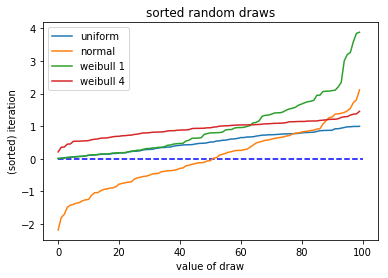

In [246]:
x = plt.plot(sorted(u_values), label='uniform')
x = plt.plot(sorted(n_values), label='normal')
x = plt.plot(sorted(w_values_1), label='weibull 1')
x = plt.plot(sorted(w_values_4), label='weibull 4')
plt.title('sorted random draws')
plt.xlabel('value of draw')
plt.ylabel('(sorted) iteration')
plt.hlines(0, 0, POINTS, color='b', linestyle='dashed')
plt.legend()

#### Other methods

name | value
:--- | :----
sum  | total of entries in the ndarray
mean | mean of entries in ndarray
std  | standard devisation of entries in the ndarray
cumsum | cumulative sum of entries in the ndarray
sort | sort the ndarray
argmax | the index of the maximum item in the ndarray
argmin | the index of the minimum item in the ndarray

Many of these can work over different axes. Think of *axis=0* as working on rows, and *axis=1* as working on columns. (I find that thinking of "x axis" and "y axis" is misleading.

In [247]:
seq_array = np.arange(6).reshape((3,2))
print(seq_array)

[[0 1]
 [2 3]
 [4 5]]


In [248]:
print(seq_array.sum())
print(seq_array.sum(axis=0))
print(seq_array.sum(axis=1))

15
[6 9]
[1 5 9]


In [249]:
print('Random array: {}\n'.format(rand_array))
print('means in total: {}'.format(rand_array.mean()))
print('std in total: {}\n'.format(rand_array.std()))
print('means moving across rows: {}'.format(rand_array.mean(axis=0)))
print('std moving across rows: {}\n'.format(rand_array.std(axis=0)))
print('means moving across columns: {}'.format(rand_array.mean(axis=1)))
print('std moving across columns: {}'.format(rand_array.std(axis=1)))

Random array: [[ 0.02561383  0.06899306  1.54549121  0.85423399]
 [ 1.83377112 -0.84107469  0.28661427 -0.4373543 ]
 [ 0.71233306 -0.95604234  1.06416755 -0.23506333]
 [ 0.93106263 -0.93221762  0.82433817 -0.159163  ]]

means in total: 0.2866064755956365
std in total: 0.8367664134128783

means moving across rows: [ 0.87569516 -0.6650854   0.9301528   0.00566334]
std moving across rows: [ 0.64620054  0.42598679  0.4533045   0.50036333]

means moving across columns: [ 0.62358302  0.2104891   0.14634873  0.16600505]
std moving across columns: [ 0.62614929  1.02057913  0.79427182  0.76330579]


In [250]:
rand_array = np.random.rand(2,3)
print(rand_array); print()
print('cumulative\n{}\n'.format(rand_array.cumsum()))
print('cumulative over rows\n{}\n'.format(rand_array.cumsum(axis=0)))
print('cumulative over columns\n{}'.format(rand_array.cumsum(axis=1)))

[[ 0.84257346  0.5132585   0.52780596]
 [ 0.92110009  0.96585079  0.77135798]]

cumulative
[ 0.84257346  1.35583197  1.88363793  2.80473802  3.77058881  4.5419468 ]

cumulative over rows
[[ 0.84257346  0.5132585   0.52780596]
 [ 1.76367356  1.47910929  1.29916395]]

cumulative over columns
[[ 0.84257346  1.35583197  1.88363793]
 [ 0.92110009  1.88695088  2.65830886]]


In [251]:
rand_list = np.random.randn(10)
print('Random list:\n{}\n'.format(rand_list))
#print(rand_list.argmax())
#print(rand_list.argmin())

print('max in {}\n\tis at index {}\n\tvalue {}'.format(rand_list, 
                                                  rand_list.argmax(),
                                                  rand_list[rand_list.argmax()]
                                                 )                                                           
     )

Random list:
[-1.11613449 -1.7521963  -0.91373097  1.66348375  0.02244338  0.95649189
 -0.83206792 -0.24969248 -1.59239606  0.9244957 ]

max in [-1.11613449 -1.7521963  -0.91373097  1.66348375  0.02244338  0.95649189
 -0.83206792 -0.24969248 -1.59239606  0.9244957 ]
	is at index 3
	value 1.663483750213086


## less silly example: microbiome data from a file

Compute average relative abundance of each taxa in a microbiome sample, and average relative abundance over all taxa in each sample.

In [252]:
import numpy as np

### The first attempt to read the file has an (instructive) problem

In [22]:
# pull off general data from file

file_name = 'microbiome_data.txt'
fh = open(file_name, 'r')
abundances = fh.read() # .split('\n')
x = [s.split('\t') for s in abundances.split('\n')]

taxa_headers = x[0][1:-3]
statistic_headers = x[0][-3:]
patient_ids = [s.pop(0) for s in x[1:]]

['Total', 'Shannon', 'Simpson']

In [ ]:
# create the ndarray

array2d = [[np.float(digit) for digit in line[1:]] for line in x[1:]] #x[1:-1]]

data = np.array(array2d)

print(data)

In [ ]:
# What went wrong? How to fix it?

#print('array: {}\n'.format(array2d))
#print([x[-1]])
#print(x[-1])

#print('{} \n\tline {}'.format(x[24], array2d[24]))
#patient_ids[24]


### example do-over

In [88]:
# 0. get the data into a format we can use

file_name = 'microbiome_data.txt'
fh = open(file_name, 'r')
abundances = fh.read() # .split('\n')
x = [l.split('\t') for l in abundances.split('\n') if l != ''] # <-- fixes problem

taxa_headers = x[0][1:-3]
statistic_headers = x[0][-3:]
patient_ids = [l.pop(0).strip() for l in x[1:]]

#print('taxa_headers: {}\n'.format(taxa_headers))
#print('statistic_headers: {}\n'.format(statistic_headers))
#print('patient_ids: {}\n'.format(patient_ids))


In [114]:
# 0. get the data into a format we can use

array2d = [[np.float(digit) for digit in line] for line in x[1:]]

data = np.array(array2d)

print('data head: {}\n'.format(data[:2]))
#print('data tail: {}\n'.format(data[-2:]))

#print(list(zip(taxa_headers+statistic_headers, data[0])))

data head: [[  4.94516432e-01   4.61420465e-02   1.39385638e-03   8.31490024e-04
    9.93904827e-02   3.23562646e-01   2.52985226e-05   1.86124719e-03
    1.38613595e-02   7.30994152e-05   1.83420418e-02   2.32880000e+04
    1.24896989e+00   2.76408392e+00]
 [  6.75225602e-01   2.84145679e-01   1.84267718e-03   3.75865305e-02
    4.46461733e-05   0.00000000e+00   2.94880868e-05   0.00000000e+00
    0.00000000e+00   4.45213288e-04   6.80164379e-04   4.09260000e+04
    7.72621598e-01   1.85843489e+00]]



In [115]:
# 0. get the data into a format we can use

sample_ids = [sample[0] for sample in data]
data_all = np.array(data)
data_totals = data_all[:,-3]
data_shannon = data_all[:,-1]
data_rel_abundances = data_all[:,:-3]

In [117]:
# 1. compute column averages

column_means = data_all.mean(axis=0)

print_pairs = list(zip(taxa_headers+statistic_headers, column_means))
print('taxa and statistic means: \n{}\n'.format('\n'.join([str(x) for x in print_pairs])))

taxa and statistic means: 
('Lactobacillus_crispatus', 0.43840475505916016)
('Lactobacillus_iners', 0.26441239340682926)
('Lactobacillus_gasseri', 0.080128531904938918)
('Lactobacillus_jensenii', 0.10882819179699561)
('Atopobium_vaginae', 0.058315099304797731)
('Megasphaera_sp._type_1', 0.022665275109257439)
('Streptococcus_anginosus', 0.0051825775285035481)
('Prevotella_genogroup_3', 0.010760423974206467)
('Clostridiales', 0.008195650556625321)
('Enterococcus_faecalis', 0.00010321410068544093)
('Corynebacterium_accolens', 0.0030038872580000322)
('Total', 43158.440000000002)
('Shannon', 0.53853906182064692)
('Simpson', 1.6183698340096688)



In [140]:
# 1a. compute column standard deviations

column_stds = data_rel_abundances.std(axis=0)

print_pairs = list(zip(taxa_headers, column_stds))
print('sample relative abundance std: \n{}\n'.format(
    '\n'.join([str(x) for x in print_pairs]) ) )

sample relative abundance std: 
('Lactobacillus_crispatus', 0.40553753575829748)
('Lactobacillus_iners', 0.29066888467660967)
('Lactobacillus_gasseri', 0.26700995020427243)
('Lactobacillus_jensenii', 0.26945737854601198)
('Atopobium_vaginae', 0.15054797031570843)
('Megasphaera_sp._type_1', 0.069852715298830276)
('Streptococcus_anginosus', 0.01521655543208985)
('Prevotella_genogroup_3', 0.033583473967716077)
('Clostridiales', 0.03198618406615665)
('Enterococcus_faecalis', 0.00027599245126451889)
('Corynebacterium_accolens', 0.0046002279633611696)



In [128]:
# 2. multiple the total number of reads by the relative abundance

#print('rel abundances: {}\n'.format(data_rel_abundances))
#print('totals: {}\n'.format(data_totals))

total_abundances = (data_rel_abundances.T * data_totals).astype(int)

#print('total abundances: {}'.format(total_abundances))

In [130]:
# 3. compute the row totals for the relative abundances (do they sum to 1?)

data_rel_abundances.sum(axis=1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

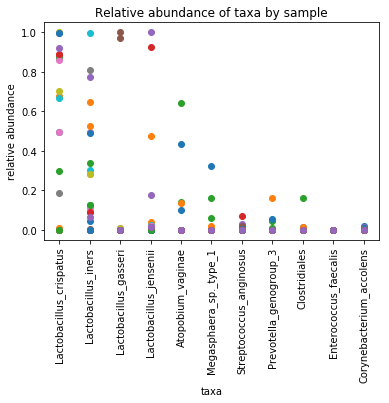

In [132]:
from matplotlib import pyplot as plt

for sample in data:
    plt.plot(sample[:-3], 'o')
plt.xlabel('taxa')
plt.ylabel('relative abundance')
plt.title('Relative abundance of taxa by sample')
x = plt.xticks(range(len(taxa_headers)), taxa_headers, rotation='vertical')

### Using random number generation

Suppose we want to create a simulation dataset of relative abundances, similar to the above dataset but with every relative abundance skewed by a gaussian amount with a spread of $\sigma^2$

In [160]:
from numpy import random as rnd
SIM_SIZE = 10

# column_means, column_stds are mean and std of taxa in the actual samples

sim_data = []
for sample in range(SIM_SIZE):
    adjustments = rnd.normal(column_means[:-3], column_stds**2)
    sim_sample = column_means[:-3] + adjustments
    sim_data.append(sim_sample)

sim_data

[array([  1.01579140e+00,   4.13598228e-01,   2.26781384e-01,
          2.67407173e-01,   1.46383223e-01,   4.42195277e-02,
          1.02253912e-02,   1.92884943e-02,   1.58386385e-02,
          2.06373011e-04,   5.98002133e-03]),
 array([  7.24336185e-01,   4.14460613e-01,   1.77952984e-01,
          2.48307114e-01,   1.23798705e-01,   5.01042952e-02,
          1.02507714e-02,   2.21069606e-02,   1.57574608e-02,
          2.06461404e-04,   5.99951319e-03]),
 array([  1.18748086e+00,   6.06335380e-01,   1.79525943e-01,
          1.23322747e-01,   1.44091227e-01,   5.18394839e-02,
          1.04627296e-02,   2.23905725e-02,   1.48541877e-02,
          2.06382799e-04,   6.02149552e-03]),
 array([  1.03181793e+00,   5.53144539e-01,   2.39624833e-01,
          2.30372132e-01,   1.08417600e-01,   5.28123175e-02,
          1.00304858e-02,   2.43657611e-02,   1.49491032e-02,
          2.06410954e-04,   5.98230423e-03]),
 array([  9.57283967e-01,   5.30620777e-01,   2.12605438e-01,
          

In [155]:
column_means

array([  4.38404755e-01,   2.64412393e-01,   8.01285319e-02,
         1.08828192e-01,   5.83150993e-02,   2.26652751e-02,
         5.18257753e-03,   1.07604240e-02,   8.19565056e-03,
         1.03214101e-04,   3.00388726e-03,   4.31584400e+04,
         5.38539062e-01,   1.61836983e+00])

In [156]:
column_stds

array([  4.05537536e-01,   2.90668885e-01,   2.67009950e-01,
         2.69457379e-01,   1.50547970e-01,   6.98527153e-02,
         1.52165554e-02,   3.35834740e-02,   3.19861841e-02,
         2.75992451e-04,   4.60022796e-03])